In [2]:
!rm *.fbs *.npy *.json *.bin

rm: cannot remove '*.bin': No such file or directory


In [1]:
# Generate 2 structure flatbuffers
!./converters/StructureGenerator.py -f ./res/posStruc.npy --num_structs 10 --num_orientations 10
# !flatc -t converters/schemas/Structure.fbs -- struct_0.fbs --raw-binary --strict-json

Namespace(filename='./res/posStruc.npy', num_structs=10, num_orientations=10, func=<function create_structure_buf_from_args at 0x7f245f41de10>)
10
(10, 10, 3)


In [9]:
# generate a parameter config (of interest is defocus [0.5,4,N] where N is number of steps)
# output file to demo_params.fbs
!./converters/ParameterGenerator.py -a [0.1] \
 -d [3.71678210546,4,1] \
 -bf [1.0] \
 -id [128,128] \
 -np [128] \
 -pw [0.3] \
 -s [0.1] \
 -ew [0.019866] \
 -snr [1.0] \
 -ep [25.0,26.0,2] \
 -seed [28.0,29.0,2] \
 -st [31.0,32.0,2] \
 -c [34.0,35.0,2] \
 -o demo_params.fbs

# !flatc -t converters/schemas/ParamModel.fbs -- demo_4x4_params.fbs --raw-binary --strict-json

[128.0, 128.0]


In [10]:
# generate images from struct_0 and output to images_0
!./DataGenerator.py images -p demo_params.fbs -s struct_0.fbs struct_1.fbs struct_2.fbs struct_3.fbs struct_4.fbs struct_5.fbs struct_6.fbs struct_7.fbs struct_8.fbs struct_9.fbs -o img100.fbs
# !flatc -t converters/schemas/DataSet.fbs -- images_0.fbs --raw-binary --strict-json
# !./DataGenerator.py images -p demo_params.fbs -s struct_1.fbs -o images_1.fbs

10
Generating images for batch:   0%|                        | 0/4 [00:00<?, ?it/s]tensor([[[ 5.3060e+00, -3.9180e+00, -5.0120e+00],
         [ 3.5360e+00, -3.5380e+00, -1.6420e+00],
         [ 4.3460e+00, -1.3880e+00,  1.4480e+00],
         [ 3.4160e+00,  2.0920e+00,  4.7999e-02],
         [ 7.4600e-01,  3.2220e+00,  2.5880e+00],
         [-7.0400e-01,  5.4320e+00, -3.1200e-01],
         [-8.8400e-01,  2.1420e+00, -2.3120e+00],
         [-3.9540e+00,  1.3820e+00, -1.2200e-01],
         [-4.4440e+00, -1.9380e+00,  1.6780e+00],
         [-7.3640e+00, -3.4880e+00,  3.6380e+00]],

        [[ 8.2458e+00,  2.0463e-01,  7.6774e-01],
         [ 4.7807e+00, -7.6163e-01,  2.0692e+00],
         [ 2.1647e+00,  1.2086e+00,  4.0944e+00],
         [ 9.5871e-01,  3.6477e+00,  1.3501e+00],
         [-2.8120e+00,  2.8535e+00,  1.2593e+00],
         [-2.7159e+00,  4.0788e+00, -2.4671e+00],
         [ 5.6405e-02,  1.4427e+00, -2.9378e+00],
         [-2.8307e+00, -1.0991e+00, -2.8876e+00],
         [-2.78

In [12]:
# generate ctfs using the demo parameters
!./DataGenerator.py ctfs -p demo_params.fbs

ctfs_wrapper


In [13]:
# synthesize images_0 using ctfs and output all generated permutations with leading tag STRUCT0
!./DataGenerator.py synth -i img100.fbs -c ctfs.fbs -o STRUCT0
# !./DataGenerator.py synth -i images_1.fbs -c ctfs.fbs -o STRUCT1
# from res.inspector import *

In [14]:
# convert any dataset flatbuffer to numpy array of complex values
from res.inspector import *

# from DataGenerator import *
# filename structure := TAG_synth_dataset_ID.fbs
# serialize_fbs_dataset("STRUCT1_synth_dataset_0.fbs")
# serialize_fbs_dataset("test_4x4_pts.fbs")
# serialize_fbs_dataset("tree_4x4_pts.fbs")

# serialize_fbs_dataset("STRUCT1_synth_dataset_1.fbs")
serialize_fbs_datasets(
[
"STRUCT0_synth_dataset_0.fbs","STRUCT0_synth_dataset_107.fbs","STRUCT0_synth_dataset_18.fbs","STRUCT0_synth_dataset_27.fbs","STRUCT0_synth_dataset_36.fbs","STRUCT0_synth_dataset_45.fbs","STRUCT0_synth_dataset_54.fbs","STRUCT0_synth_dataset_63.fbs","STRUCT0_synth_dataset_72.fbs","STRUCT0_synth_dataset_81.fbs","STRUCT0_synth_dataset_90.fbs",
"STRUCT0_synth_dataset_1.fbs","STRUCT0_synth_dataset_108.fbs","STRUCT0_synth_dataset_19.fbs","STRUCT0_synth_dataset_28.fbs","STRUCT0_synth_dataset_37.fbs","STRUCT0_synth_dataset_46.fbs","STRUCT0_synth_dataset_55.fbs","STRUCT0_synth_dataset_64.fbs","STRUCT0_synth_dataset_73.fbs","STRUCT0_synth_dataset_82.fbs","STRUCT0_synth_dataset_91.fbs",
"STRUCT0_synth_dataset_10.fbs" ,"STRUCT0_synth_dataset_109.fbs","STRUCT0_synth_dataset_2.fbs" ,"STRUCT0_synth_dataset_29.fbs","STRUCT0_synth_dataset_38.fbs","STRUCT0_synth_dataset_47.fbs","STRUCT0_synth_dataset_56.fbs","STRUCT0_synth_dataset_65.fbs","STRUCT0_synth_dataset_74.fbs","STRUCT0_synth_dataset_83.fbs","STRUCT0_synth_dataset_92.fbs",
"STRUCT0_synth_dataset_100.fbs","STRUCT0_synth_dataset_11.fbs" ,"STRUCT0_synth_dataset_20.fbs","STRUCT0_synth_dataset_3.fbs" ,"STRUCT0_synth_dataset_39.fbs","STRUCT0_synth_dataset_48.fbs","STRUCT0_synth_dataset_57.fbs","STRUCT0_synth_dataset_66.fbs","STRUCT0_synth_dataset_75.fbs","STRUCT0_synth_dataset_84.fbs","STRUCT0_synth_dataset_93.fbs",
"STRUCT0_synth_dataset_101.fbs","STRUCT0_synth_dataset_12.fbs" ,"STRUCT0_synth_dataset_21.fbs","STRUCT0_synth_dataset_30.fbs","STRUCT0_synth_dataset_4.fbs" ,"STRUCT0_synth_dataset_49.fbs","STRUCT0_synth_dataset_58.fbs","STRUCT0_synth_dataset_67.fbs","STRUCT0_synth_dataset_76.fbs","STRUCT0_synth_dataset_85.fbs","STRUCT0_synth_dataset_94.fbs",
"STRUCT0_synth_dataset_102.fbs","STRUCT0_synth_dataset_13.fbs" ,"STRUCT0_synth_dataset_22.fbs","STRUCT0_synth_dataset_31.fbs","STRUCT0_synth_dataset_40.fbs","STRUCT0_synth_dataset_5.fbs" ,"STRUCT0_synth_dataset_59.fbs","STRUCT0_synth_dataset_68.fbs","STRUCT0_synth_dataset_77.fbs","STRUCT0_synth_dataset_86.fbs","STRUCT0_synth_dataset_95.fbs",
"STRUCT0_synth_dataset_103.fbs","STRUCT0_synth_dataset_14.fbs" ,"STRUCT0_synth_dataset_23.fbs","STRUCT0_synth_dataset_32.fbs","STRUCT0_synth_dataset_41.fbs","STRUCT0_synth_dataset_50.fbs","STRUCT0_synth_dataset_6.fbs" ,"STRUCT0_synth_dataset_69.fbs","STRUCT0_synth_dataset_78.fbs","STRUCT0_synth_dataset_87.fbs","STRUCT0_synth_dataset_96.fbs",
"STRUCT0_synth_dataset_104.fbs","STRUCT0_synth_dataset_15.fbs" ,"STRUCT0_synth_dataset_24.fbs","STRUCT0_synth_dataset_33.fbs","STRUCT0_synth_dataset_42.fbs","STRUCT0_synth_dataset_51.fbs","STRUCT0_synth_dataset_60.fbs","STRUCT0_synth_dataset_7.fbs" ,"STRUCT0_synth_dataset_79.fbs","STRUCT0_synth_dataset_88.fbs","STRUCT0_synth_dataset_97.fbs",
"STRUCT0_synth_dataset_105.fbs","STRUCT0_synth_dataset_16.fbs" ,"STRUCT0_synth_dataset_25.fbs","STRUCT0_synth_dataset_34.fbs","STRUCT0_synth_dataset_43.fbs","STRUCT0_synth_dataset_52.fbs","STRUCT0_synth_dataset_61.fbs","STRUCT0_synth_dataset_70.fbs","STRUCT0_synth_dataset_8.fbs" ,"STRUCT0_synth_dataset_89.fbs","STRUCT0_synth_dataset_98.fbs",
"STRUCT0_synth_dataset_106.fbs","STRUCT0_synth_dataset_17.fbs" ,"STRUCT0_synth_dataset_26.fbs","STRUCT0_synth_dataset_35.fbs","STRUCT0_synth_dataset_44.fbs","STRUCT0_synth_dataset_53.fbs","STRUCT0_synth_dataset_62.fbs","STRUCT0_synth_dataset_71.fbs","STRUCT0_synth_dataset_80.fbs","STRUCT0_synth_dataset_9.fbs" ,"STRUCT0_synth_dataset_99.fbs"
]
)

(110, 128, 128)


In [56]:
from scipy.io import savemat

mat_file_path = "oriented_structure.mat"
d1 = np.load("serialized_STRUCT0_synth_dataset_0.npy")
d2 = np.load("serialized_STRUCT0_synth_dataset_1.npy")
# d3 = np.load("")
savemat(mat_file_path, {"data1": d1, "data2": d2})

In [ ]:
# peek at the files
f = ["serialized_STRUCT0_synth_dataset_0.npy", "serialized_files.npy", "images"]
ID = 1
import matplotlib.pyplot as plt

serialized_synth_imgs = np.load(f[ID])
serialized_imgs = np.load(f[ID])
r, c = 5, 5
fig, axes = plt.subplots(r, c)
for i in range(r):
    for j in range(c):
        axes[i, j].imshow(np.real(serialized_synth_imgs[i * r + j]))
axes[r - 1, c - 1].imshow(np.real(serialized_imgs[0]), cmap="gray")

plt.show()

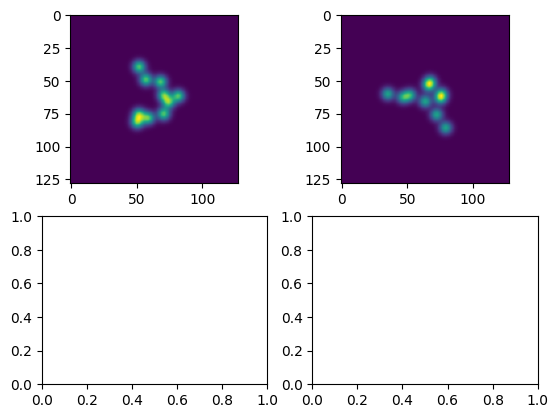

In [15]:
img_0 = np.load("serialized_images_0.npy")
img_1 = np.load("serialized_images_0.npy")
r, c = 5, 5
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(np.real(img_0[0]))
axes[0, 1].imshow(np.real(img_1[1]))

plt.show()

In [ ]:
ctf_paramSet_buf = ParametersT.InitFromObj(
    DataSet.GetRootAsDataSet(dl.load_flatbuffer("ctfs.fbs"), 0).Params()
)
serialized_ctfs = np.load("serialized_STRUCT0_synth_dataset_0.npy")

row = 5
col = 5
f = 0
fig, axes = plt.subplots(row, col)
for i in range(row):
    for j in range(col):
        # print())
        axes[i, j].imshow(np.real(np.fft.fftshift(serialized_ctfs[(i + f) * row + j])))
        # axes[i,j].imshow(get_phase(np.fft.fftshift(b[(i+f)*row+j]),128),cmap="Greys")
        axes[i, j].set_title(f"{ctf_paramSet_buf.defocus[(i+f)*row+j]}", fontsize=6)